In [2]:
import numpy as np
import pandas as pd

# Fill in weather

In [3]:
train_x = pd.read_csv('X_train_NHkHMNU.csv')
train_x

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,1054,206,FR,0.210099,-0.427458,-0.606523,0.606523,NaN,0.692860,NaN,...,-0.444661,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445
1,2049,501,FR,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,...,-1.183194,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365
2,1924,687,FR,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,...,1.947273,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952
3,297,720,DE,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,...,-0.976974,-1.114838,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948
4,1101,818,FR,0.143807,-0.617038,-0.924990,0.924990,NaN,0.990324,NaN,...,-0.526267,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,459,809,DE,1.529204,1.106682,-1.855327,1.855327,-0.218658,1.450426,0.218658,...,0.509514,NaN,NaN,NaN,NaN,NaN,NaN,0.876984,0.819520,1.320373
1490,1674,887,FR,1.618582,1.752840,0.611392,-0.611392,0.449153,-0.152146,-0.449153,...,1.666252,NaN,NaN,NaN,NaN,NaN,NaN,0.932633,-0.085690,0.356356
1491,748,1083,DE,0.856399,0.489199,-0.255778,0.255778,-1.531544,-0.829568,1.531544,...,0.358120,0.207905,0.404763,-0.594595,0.894011,0.256338,0.402316,-1.112899,-0.237835,0.067152
1492,1454,1133,FR,0.560689,-0.343777,-0.830239,0.830239,-0.304856,1.210230,0.304856,...,-0.184862,-0.682815,-0.390304,-0.972088,-1.501930,1.215528,1.338708,0.962812,-5.392852,-0.843812


In [4]:
print(train_x.columns)

Index(['ID', 'DAY_ID', 'COUNTRY', 'DE_CONSUMPTION', 'FR_CONSUMPTION',
       'DE_FR_EXCHANGE', 'FR_DE_EXCHANGE', 'DE_NET_EXPORT', 'FR_NET_EXPORT',
       'DE_NET_IMPORT', 'FR_NET_IMPORT', 'DE_GAS', 'FR_GAS', 'DE_COAL',
       'FR_COAL', 'DE_HYDRO', 'FR_HYDRO', 'DE_NUCLEAR', 'FR_NUCLEAR',
       'DE_SOLAR', 'FR_SOLAR', 'DE_WINDPOW', 'FR_WINDPOW', 'DE_LIGNITE',
       'DE_RESIDUAL_LOAD', 'FR_RESIDUAL_LOAD', 'DE_RAIN', 'FR_RAIN', 'DE_WIND',
       'FR_WIND', 'DE_TEMP', 'FR_TEMP', 'GAS_RET', 'COAL_RET', 'CARBON_RET'],
      dtype='object')


In [5]:
df_fr = train_x[train_x['COUNTRY']=='FR'].sort_values(by='DAY_ID')
df_fr = df_fr.reset_index(drop=True)
df_fr

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,1057,0,FR,0.048418,-0.465067,-0.079296,0.079296,NaN,0.650577,NaN,...,-0.344706,-0.987968,-0.856204,-0.655528,-1.099226,0.279885,0.583874,-1.071996,-0.074767,0.798003
1,1179,1,FR,0.966997,1.222131,0.331356,-0.331356,0.405549,0.778627,-0.405549,...,1.214288,-0.370990,-0.497520,-1.184018,-1.465608,1.349212,0.231602,1.480313,0.931562,0.822047
2,1327,2,FR,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,...,-0.540642,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235,1.802550,1.140920,0.900434
3,2016,3,FR,-0.134670,-0.834564,-1.051716,1.051716,-1.881881,-0.612133,1.881881,...,-0.856321,-1.394561,-1.118297,0.244859,0.488650,-1.710888,-0.951057,0.440121,-0.064550,-0.032756
4,2047,5,FR,-0.297850,-0.470371,0.144615,-0.144615,-1.208286,-1.811403,1.208286,...,-0.552878,-1.374757,-0.790071,0.333817,0.021868,-0.062187,1.459745,-0.117977,0.550433,0.781870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,2039,1208,FR,0.046568,-0.709011,0.427976,-0.427976,-0.578391,-1.678101,0.578391,...,-0.666261,-1.224735,2.661142,0.472212,0.630211,1.065727,-1.439105,0.291714,0.568479,0.395742
847,972,1209,FR,1.109804,1.301061,1.565552,-1.565552,NaN,NaN,NaN,...,1.038585,0.457145,-0.202629,-0.395438,-0.463636,-0.251075,-0.387127,-0.411589,1.774694,1.038661
848,1987,1212,FR,-0.046100,-0.520506,-0.270515,0.270515,-0.137917,-0.789824,0.137917,...,-0.589767,-0.039379,-0.237434,1.358211,1.123953,-0.707839,-0.308232,0.017778,0.072168,-0.160792
849,1688,1213,FR,1.407027,1.313254,-0.456126,0.456126,0.333142,-0.069222,-0.333142,...,0.868310,NaN,NaN,NaN,NaN,NaN,NaN,-0.103642,-0.633007,0.214805


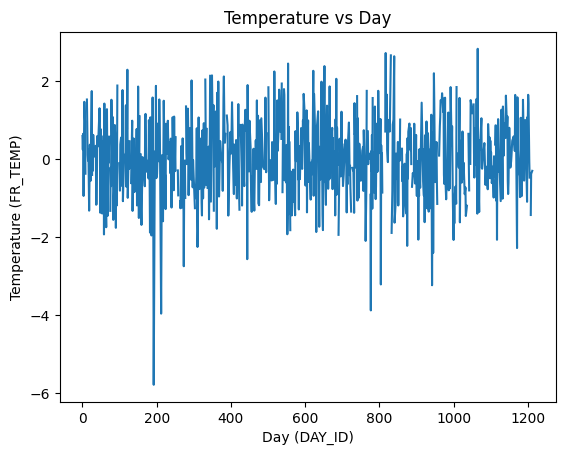

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

plt.plot(df_fr['DAY_ID'], df_fr['FR_TEMP'])

plt.title('Temperature vs Day')
plt.xlabel('Day (DAY_ID)')
plt.ylabel('Temperature (FR_TEMP)')

plt.show()

In [7]:
def fill_in_weather(df):
    interested_cols = ['DE_RAIN', 'FR_RAIN', 'DE_WIND', 'FR_WIND', 'DE_TEMP', 'FR_TEMP']

    # Identify blocks of rows that don't meet the criterion and adjust
    start = None
    for i in range(1, len(df)):
        # Start of a non-satisfying block
        if start is None and all([pd.isna(df.at[i, col]) for col in interested_cols]):
            start = i
        # End of a non-satisfying block and get the next row
        elif start is not None and not all([pd.isna(df.at[i, col]) for col in interested_cols]):
            end = i
            # Compute the mean of the start and end rows for interested columns
            mean_values = df.loc[[start-1, end], interested_cols].mean()
            # Apply mean values to all rows in the block for each column
            for col in interested_cols: 
                df.loc[start:end-1, col] = mean_values[col]
            start = None
            
    return df


In [8]:
df_fr_in = fill_in_weather(df_fr)
df_fr_in

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,1057,0,FR,0.048418,-0.465067,-0.079296,0.079296,NaN,0.650577,NaN,...,-0.344706,-0.987968,-0.856204,-0.655528,-1.099226,0.279885,0.583874,-1.071996,-0.074767,0.798003
1,1179,1,FR,0.966997,1.222131,0.331356,-0.331356,0.405549,0.778627,-0.405549,...,1.214288,-0.370990,-0.497520,-1.184018,-1.465608,1.349212,0.231602,1.480313,0.931562,0.822047
2,1327,2,FR,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,...,-0.540642,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235,1.802550,1.140920,0.900434
3,2016,3,FR,-0.134670,-0.834564,-1.051716,1.051716,-1.881881,-0.612133,1.881881,...,-0.856321,-1.394561,-1.118297,0.244859,0.488650,-1.710888,-0.951057,0.440121,-0.064550,-0.032756
4,2047,5,FR,-0.297850,-0.470371,0.144615,-0.144615,-1.208286,-1.811403,1.208286,...,-0.552878,-1.374757,-0.790071,0.333817,0.021868,-0.062187,1.459745,-0.117977,0.550433,0.781870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,2039,1208,FR,0.046568,-0.709011,0.427976,-0.427976,-0.578391,-1.678101,0.578391,...,-0.666261,-1.224735,2.661142,0.472212,0.630211,1.065727,-1.439105,0.291714,0.568479,0.395742
847,972,1209,FR,1.109804,1.301061,1.565552,-1.565552,NaN,NaN,NaN,...,1.038585,0.457145,-0.202629,-0.395438,-0.463636,-0.251075,-0.387127,-0.411589,1.774694,1.038661
848,1987,1212,FR,-0.046100,-0.520506,-0.270515,0.270515,-0.137917,-0.789824,0.137917,...,-0.589767,-0.039379,-0.237434,1.358211,1.123953,-0.707839,-0.308232,0.017778,0.072168,-0.160792
849,1688,1213,FR,1.407027,1.313254,-0.456126,0.456126,0.333142,-0.069222,-0.333142,...,0.868310,-0.342771,0.250384,0.227416,0.120661,-0.477558,0.223629,-0.103642,-0.633007,0.214805


In [9]:
# check the 849 row
print((-0.237434+0.738201)/2)
print((-0.039379-0.646163)/2)

0.2503835
-0.34277100000000005


In [10]:
# save to csv
df_fr_in.to_csv('df_fr_full.csv')

In [11]:
df_de = train_x[train_x['COUNTRY']=='DE'].sort_values(by='DAY_ID')
df_de = df_de.reset_index(drop=True)
df_de

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,111,2,DE,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,...,-0.540642,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235,1.802550,1.140920,0.900434
1,800,3,DE,-0.134670,-0.834564,-1.051716,1.051716,-1.881881,-0.612133,1.881881,...,-0.856321,-1.394561,-1.118297,0.244859,0.488650,-1.710888,-0.951057,0.440121,-0.064550,-0.032756
2,831,5,DE,-0.297850,-0.470371,0.144615,-0.144615,-1.208286,-1.811403,1.208286,...,-0.552878,-1.374757,-0.790071,0.333817,0.021868,-0.062187,1.459745,-0.117977,0.550433,0.781870
3,779,7,DE,0.057599,-0.625625,0.002239,-0.002239,-0.676226,-0.745182,0.676226,...,-0.806379,-0.531862,-0.663419,0.098940,1.367421,-0.812164,0.954384,-0.379980,0.518459,-0.034642
4,841,8,DE,-0.282744,-0.700027,1.309253,-1.309253,0.248085,-2.226840,-0.248085,...,-0.791016,1.522720,-0.307449,1.690497,1.584210,-0.441943,-0.382423,1.557325,0.146634,2.329924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,282,1202,DE,-1.182561,-1.259840,-1.201004,1.201004,-1.616737,0.619501,1.616737,...,-1.359708,-0.085663,-0.997403,-0.595651,-0.777719,0.039450,1.411276,0.184767,0.257420,0.507079
639,505,1207,DE,1.002463,0.516789,0.651648,-0.651648,0.728817,-0.820640,-0.728817,...,0.236243,NaN,NaN,NaN,NaN,NaN,NaN,0.099209,1.750872,0.646905
640,823,1208,DE,0.046568,-0.709011,0.427976,-0.427976,-0.578391,-1.678101,0.578391,...,-0.666261,-1.224735,2.661142,0.472212,0.630211,1.065727,-1.439105,0.291714,0.568479,0.395742
641,771,1212,DE,-0.046100,-0.520506,-0.270515,0.270515,-0.137917,-0.789824,0.137917,...,-0.589767,-0.039379,-0.237434,1.358211,1.123953,-0.707839,-0.308232,0.017778,0.072168,-0.160792


In [12]:
# check whether days in fr are all in de
f = set(df_fr_in['DAY_ID'])
d = set(df_de['DAY_ID'])
print(len(f-d))
print(len(d-f))

208
0


In [13]:
interested_cols = ['DE_RAIN', 'FR_RAIN', 'DE_WIND', 'FR_WIND', 'DE_TEMP', 'FR_TEMP']
merged_df = pd.merge(df_de, df_fr_in[['DAY_ID'] + interested_cols], on='DAY_ID', how='left', suffixes=('_de', ''))
merged_df

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_TEMP_de,GAS_RET,COAL_RET,CARBON_RET,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP
0,111,2,DE,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,...,0.641235,1.802550,1.140920,0.900434,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235
1,800,3,DE,-0.134670,-0.834564,-1.051716,1.051716,-1.881881,-0.612133,1.881881,...,-0.951057,0.440121,-0.064550,-0.032756,-1.394561,-1.118297,0.244859,0.488650,-1.710888,-0.951057
2,831,5,DE,-0.297850,-0.470371,0.144615,-0.144615,-1.208286,-1.811403,1.208286,...,1.459745,-0.117977,0.550433,0.781870,-1.374757,-0.790071,0.333817,0.021868,-0.062187,1.459745
3,779,7,DE,0.057599,-0.625625,0.002239,-0.002239,-0.676226,-0.745182,0.676226,...,0.954384,-0.379980,0.518459,-0.034642,-0.531862,-0.663419,0.098940,1.367421,-0.812164,0.954384
4,841,8,DE,-0.282744,-0.700027,1.309253,-1.309253,0.248085,-2.226840,-0.248085,...,-0.382423,1.557325,0.146634,2.329924,1.522720,-0.307449,1.690497,1.584210,-0.441943,-0.382423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,282,1202,DE,-1.182561,-1.259840,-1.201004,1.201004,-1.616737,0.619501,1.616737,...,1.411276,0.184767,0.257420,0.507079,-0.085663,-0.997403,-0.595651,-0.777719,0.039450,1.411276
639,505,1207,DE,1.002463,0.516789,0.651648,-0.651648,0.728817,-0.820640,-0.728817,...,NaN,0.099209,1.750872,0.646905,-0.222964,1.112782,0.371728,-0.018442,0.355241,-0.960526
640,823,1208,DE,0.046568,-0.709011,0.427976,-0.427976,-0.578391,-1.678101,0.578391,...,-1.439105,0.291714,0.568479,0.395742,-1.224735,2.661142,0.472212,0.630211,1.065727,-1.439105
641,771,1212,DE,-0.046100,-0.520506,-0.270515,0.270515,-0.137917,-0.789824,0.137917,...,-0.308232,0.017778,0.072168,-0.160792,-0.039379,-0.237434,1.358211,1.123953,-0.707839,-0.308232


In [14]:
df_de_in = merged_df[[col for col in merged_df.columns if not col.endswith('_de')]]
df_de_in

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,GAS_RET,COAL_RET,CARBON_RET,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP
0,111,2,DE,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,...,-0.540642,1.802550,1.140920,0.900434,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235
1,800,3,DE,-0.134670,-0.834564,-1.051716,1.051716,-1.881881,-0.612133,1.881881,...,-0.856321,0.440121,-0.064550,-0.032756,-1.394561,-1.118297,0.244859,0.488650,-1.710888,-0.951057
2,831,5,DE,-0.297850,-0.470371,0.144615,-0.144615,-1.208286,-1.811403,1.208286,...,-0.552878,-0.117977,0.550433,0.781870,-1.374757,-0.790071,0.333817,0.021868,-0.062187,1.459745
3,779,7,DE,0.057599,-0.625625,0.002239,-0.002239,-0.676226,-0.745182,0.676226,...,-0.806379,-0.379980,0.518459,-0.034642,-0.531862,-0.663419,0.098940,1.367421,-0.812164,0.954384
4,841,8,DE,-0.282744,-0.700027,1.309253,-1.309253,0.248085,-2.226840,-0.248085,...,-0.791016,1.557325,0.146634,2.329924,1.522720,-0.307449,1.690497,1.584210,-0.441943,-0.382423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,282,1202,DE,-1.182561,-1.259840,-1.201004,1.201004,-1.616737,0.619501,1.616737,...,-1.359708,0.184767,0.257420,0.507079,-0.085663,-0.997403,-0.595651,-0.777719,0.039450,1.411276
639,505,1207,DE,1.002463,0.516789,0.651648,-0.651648,0.728817,-0.820640,-0.728817,...,0.236243,0.099209,1.750872,0.646905,-0.222964,1.112782,0.371728,-0.018442,0.355241,-0.960526
640,823,1208,DE,0.046568,-0.709011,0.427976,-0.427976,-0.578391,-1.678101,0.578391,...,-0.666261,0.291714,0.568479,0.395742,-1.224735,2.661142,0.472212,0.630211,1.065727,-1.439105
641,771,1212,DE,-0.046100,-0.520506,-0.270515,0.270515,-0.137917,-0.789824,0.137917,...,-0.589767,0.017778,0.072168,-0.160792,-0.039379,-0.237434,1.358211,1.123953,-0.707839,-0.308232


In [15]:
df_de_in = df_de_in.reindex(columns=train_x.columns)
df_de_in

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,111,2,DE,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,...,-0.540642,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235,1.802550,1.140920,0.900434
1,800,3,DE,-0.134670,-0.834564,-1.051716,1.051716,-1.881881,-0.612133,1.881881,...,-0.856321,-1.394561,-1.118297,0.244859,0.488650,-1.710888,-0.951057,0.440121,-0.064550,-0.032756
2,831,5,DE,-0.297850,-0.470371,0.144615,-0.144615,-1.208286,-1.811403,1.208286,...,-0.552878,-1.374757,-0.790071,0.333817,0.021868,-0.062187,1.459745,-0.117977,0.550433,0.781870
3,779,7,DE,0.057599,-0.625625,0.002239,-0.002239,-0.676226,-0.745182,0.676226,...,-0.806379,-0.531862,-0.663419,0.098940,1.367421,-0.812164,0.954384,-0.379980,0.518459,-0.034642
4,841,8,DE,-0.282744,-0.700027,1.309253,-1.309253,0.248085,-2.226840,-0.248085,...,-0.791016,1.522720,-0.307449,1.690497,1.584210,-0.441943,-0.382423,1.557325,0.146634,2.329924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,282,1202,DE,-1.182561,-1.259840,-1.201004,1.201004,-1.616737,0.619501,1.616737,...,-1.359708,-0.085663,-0.997403,-0.595651,-0.777719,0.039450,1.411276,0.184767,0.257420,0.507079
639,505,1207,DE,1.002463,0.516789,0.651648,-0.651648,0.728817,-0.820640,-0.728817,...,0.236243,-0.222964,1.112782,0.371728,-0.018442,0.355241,-0.960526,0.099209,1.750872,0.646905
640,823,1208,DE,0.046568,-0.709011,0.427976,-0.427976,-0.578391,-1.678101,0.578391,...,-0.666261,-1.224735,2.661142,0.472212,0.630211,1.065727,-1.439105,0.291714,0.568479,0.395742
641,771,1212,DE,-0.046100,-0.520506,-0.270515,0.270515,-0.137917,-0.789824,0.137917,...,-0.589767,-0.039379,-0.237434,1.358211,1.123953,-0.707839,-0.308232,0.017778,0.072168,-0.160792


In [16]:
# save to csv
df_de_in.to_csv('df_de_full.csv')

In [17]:
fr = pd.read_csv('df_fr_full.csv')
de = pd.read_csv('df_de_full.csv')

In [18]:
X_train = pd.concat([fr, de], axis=0)
X_train = X_train.reset_index(drop=True)
X_train = X_train.iloc[:,1:]
X_train

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,1057,0,FR,0.048418,-0.465067,-0.079296,0.079296,NaN,0.650577,NaN,...,-0.344706,-0.987968,-0.856204,-0.655528,-1.099226,0.279885,0.583874,-1.071996,-0.074767,0.798003
1,1179,1,FR,0.966997,1.222131,0.331356,-0.331356,0.405549,0.778627,-0.405549,...,1.214288,-0.370990,-0.497520,-1.184018,-1.465608,1.349212,0.231602,1.480313,0.931562,0.822047
2,1327,2,FR,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,...,-0.540642,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235,1.802550,1.140920,0.900434
3,2016,3,FR,-0.134670,-0.834564,-1.051716,1.051716,-1.881881,-0.612133,1.881881,...,-0.856321,-1.394561,-1.118297,0.244859,0.488650,-1.710888,-0.951057,0.440121,-0.064550,-0.032756
4,2047,5,FR,-0.297850,-0.470371,0.144615,-0.144615,-1.208286,-1.811403,1.208286,...,-0.552878,-1.374757,-0.790071,0.333817,0.021868,-0.062187,1.459745,-0.117977,0.550433,0.781870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,282,1202,DE,-1.182561,-1.259840,-1.201004,1.201004,-1.616737,0.619501,1.616737,...,-1.359708,-0.085663,-0.997403,-0.595651,-0.777719,0.039450,1.411276,0.184767,0.257420,0.507079
1490,505,1207,DE,1.002463,0.516789,0.651648,-0.651648,0.728817,-0.820640,-0.728817,...,0.236243,-0.222964,1.112782,0.371728,-0.018442,0.355241,-0.960526,0.099209,1.750872,0.646905
1491,823,1208,DE,0.046568,-0.709011,0.427976,-0.427976,-0.578391,-1.678101,0.578391,...,-0.666261,-1.224735,2.661142,0.472212,0.630211,1.065727,-1.439105,0.291714,0.568479,0.395742
1492,771,1212,DE,-0.046100,-0.520506,-0.270515,0.270515,-0.137917,-0.789824,0.137917,...,-0.589767,-0.039379,-0.237434,1.358211,1.123953,-0.707839,-0.308232,0.017778,0.072168,-0.160792


In [19]:
y_train = pd.read_csv('y_train_ZAN5mwg.csv')
y_train

,ID,TARGET
0,1054,0.028313
1,2049,-0.112516
2,1924,-0.180840
3,297,-0.260356
4,1101,-0.071733
...,...,...
1489,459,-0.172597
1490,1674,-0.063546
1491,748,0.151797
1492,1454,-0.640917


In [20]:
train_data = pd.merge(X_train, y_train, on='ID')
train_data

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,TARGET
0,1057,0,FR,0.048418,-0.465067,-0.079296,0.079296,NaN,0.650577,NaN,...,-0.987968,-0.856204,-0.655528,-1.099226,0.279885,0.583874,-1.071996,-0.074767,0.798003,0.108953
1,1179,1,FR,0.966997,1.222131,0.331356,-0.331356,0.405549,0.778627,-0.405549,...,-0.370990,-0.497520,-1.184018,-1.465608,1.349212,0.231602,1.480313,0.931562,0.822047,-0.063369
2,1327,2,FR,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,...,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235,1.802550,1.140920,0.900434,2.575976
3,2016,3,FR,-0.134670,-0.834564,-1.051716,1.051716,-1.881881,-0.612133,1.881881,...,-1.394561,-1.118297,0.244859,0.488650,-1.710888,-0.951057,0.440121,-0.064550,-0.032756,0.068905
4,2047,5,FR,-0.297850,-0.470371,0.144615,-0.144615,-1.208286,-1.811403,1.208286,...,-1.374757,-0.790071,0.333817,0.021868,-0.062187,1.459745,-0.117977,0.550433,0.781870,1.031308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,282,1202,DE,-1.182561,-1.259840,-1.201004,1.201004,-1.616737,0.619501,1.616737,...,-0.085663,-0.997403,-0.595651,-0.777719,0.039450,1.411276,0.184767,0.257420,0.507079,-0.091774
1490,505,1207,DE,1.002463,0.516789,0.651648,-0.651648,0.728817,-0.820640,-0.728817,...,-0.222964,1.112782,0.371728,-0.018442,0.355241,-0.960526,0.099209,1.750872,0.646905,-1.324555
1491,823,1208,DE,0.046568,-0.709011,0.427976,-0.427976,-0.578391,-1.678101,0.578391,...,-1.224735,2.661142,0.472212,0.630211,1.065727,-1.439105,0.291714,0.568479,0.395742,0.060380
1492,771,1212,DE,-0.046100,-0.520506,-0.270515,0.270515,-0.137917,-0.789824,0.137917,...,-0.039379,-0.237434,1.358211,1.123953,-0.707839,-0.308232,0.017778,0.072168,-0.160792,-0.144320


In [21]:
full_data = train_data.dropna()
full_data

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,TARGET
1,1179,1,FR,0.966997,1.222131,0.331356,-0.331356,0.405549,0.778627,-0.405549,...,-0.370990,-0.497520,-1.184018,-1.465608,1.349212,0.231602,1.480313,0.931562,0.822047,-0.063369
2,1327,2,FR,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,...,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235,1.802550,1.140920,0.900434,2.575976
3,2016,3,FR,-0.134670,-0.834564,-1.051716,1.051716,-1.881881,-0.612133,1.881881,...,-1.394561,-1.118297,0.244859,0.488650,-1.710888,-0.951057,0.440121,-0.064550,-0.032756,0.068905
4,2047,5,FR,-0.297850,-0.470371,0.144615,-0.144615,-1.208286,-1.811403,1.208286,...,-1.374757,-0.790071,0.333817,0.021868,-0.062187,1.459745,-0.117977,0.550433,0.781870,1.031308
5,1995,7,FR,0.057599,-0.625625,0.002239,-0.002239,-0.676226,-0.745182,0.676226,...,-0.531862,-0.663419,0.098940,1.367421,-0.812164,0.954384,-0.379980,0.518459,-0.034642,-0.118915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,282,1202,DE,-1.182561,-1.259840,-1.201004,1.201004,-1.616737,0.619501,1.616737,...,-0.085663,-0.997403,-0.595651,-0.777719,0.039450,1.411276,0.184767,0.257420,0.507079,-0.091774
1490,505,1207,DE,1.002463,0.516789,0.651648,-0.651648,0.728817,-0.820640,-0.728817,...,-0.222964,1.112782,0.371728,-0.018442,0.355241,-0.960526,0.099209,1.750872,0.646905,-1.324555
1491,823,1208,DE,0.046568,-0.709011,0.427976,-0.427976,-0.578391,-1.678101,0.578391,...,-1.224735,2.661142,0.472212,0.630211,1.065727,-1.439105,0.291714,0.568479,0.395742,0.060380
1492,771,1212,DE,-0.046100,-0.520506,-0.270515,0.270515,-0.137917,-0.789824,0.137917,...,-0.039379,-0.237434,1.358211,1.123953,-0.707839,-0.308232,0.017778,0.072168,-0.160792,-0.144320


In [22]:
full_data.columns

Index(['ID', 'DAY_ID', 'COUNTRY', 'DE_CONSUMPTION', 'FR_CONSUMPTION',
       'DE_FR_EXCHANGE', 'FR_DE_EXCHANGE', 'DE_NET_EXPORT', 'FR_NET_EXPORT',
       'DE_NET_IMPORT', 'FR_NET_IMPORT', 'DE_GAS', 'FR_GAS', 'DE_COAL',
       'FR_COAL', 'DE_HYDRO', 'FR_HYDRO', 'DE_NUCLEAR', 'FR_NUCLEAR',
       'DE_SOLAR', 'FR_SOLAR', 'DE_WINDPOW', 'FR_WINDPOW', 'DE_LIGNITE',
       'DE_RESIDUAL_LOAD', 'FR_RESIDUAL_LOAD', 'DE_RAIN', 'FR_RAIN', 'DE_WIND',
       'FR_WIND', 'DE_TEMP', 'FR_TEMP', 'GAS_RET', 'COAL_RET', 'CARBON_RET',
       'TARGET'],
      dtype='object')

# fr data preprocess

In [23]:
fr = full_data[full_data['COUNTRY']=='FR']
fr

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,TARGET
1,1179,1,FR,0.966997,1.222131,0.331356,-0.331356,0.405549,0.778627,-0.405549,...,-0.370990,-0.497520,-1.184018,-1.465608,1.349212,0.231602,1.480313,0.931562,0.822047,-0.063369
2,1327,2,FR,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,...,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235,1.802550,1.140920,0.900434,2.575976
3,2016,3,FR,-0.134670,-0.834564,-1.051716,1.051716,-1.881881,-0.612133,1.881881,...,-1.394561,-1.118297,0.244859,0.488650,-1.710888,-0.951057,0.440121,-0.064550,-0.032756,0.068905
4,2047,5,FR,-0.297850,-0.470371,0.144615,-0.144615,-1.208286,-1.811403,1.208286,...,-1.374757,-0.790071,0.333817,0.021868,-0.062187,1.459745,-0.117977,0.550433,0.781870,1.031308
5,1995,7,FR,0.057599,-0.625625,0.002239,-0.002239,-0.676226,-0.745182,0.676226,...,-0.531862,-0.663419,0.098940,1.367421,-0.812164,0.954384,-0.379980,0.518459,-0.034642,-0.118915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,1120,1205,FR,0.958188,-0.100235,0.381612,-0.381612,1.045392,0.106216,-1.045392,...,0.778808,-0.435577,0.271245,-0.667096,-0.355244,-0.481947,0.047390,0.562084,-0.954402,-0.028575
845,1721,1207,FR,1.002463,0.516789,0.651648,-0.651648,0.728817,-0.820640,-0.728817,...,-0.222964,1.112782,0.371728,-0.018442,0.355241,-0.960526,0.099209,1.750872,0.646905,-0.729755
846,2039,1208,FR,0.046568,-0.709011,0.427976,-0.427976,-0.578391,-1.678101,0.578391,...,-1.224735,2.661142,0.472212,0.630211,1.065727,-1.439105,0.291714,0.568479,0.395742,0.136028
848,1987,1212,FR,-0.046100,-0.520506,-0.270515,0.270515,-0.137917,-0.789824,0.137917,...,-0.039379,-0.237434,1.358211,1.123953,-0.707839,-0.308232,0.017778,0.072168,-0.160792,-0.425474


In [24]:
fr_train = fr[['ID', 'DAY_ID', 'FR_CONSUMPTION', 'FR_DE_EXCHANGE', 'FR_NET_EXPORT', 'FR_NET_IMPORT', 'FR_GAS', 'FR_COAL', 'FR_HYDRO', 'FR_NUCLEAR', 'FR_SOLAR', 'FR_WINDPOW', 'FR_RESIDUAL_LOAD', 'FR_RAIN', 'FR_WIND', 'FR_TEMP', 'GAS_RET', 'COAL_RET', 'CARBON_RET',
       'TARGET']]
fr_train.columns

Index(['ID', 'DAY_ID', 'FR_CONSUMPTION', 'FR_DE_EXCHANGE', 'FR_NET_EXPORT',
       'FR_NET_IMPORT', 'FR_GAS', 'FR_COAL', 'FR_HYDRO', 'FR_NUCLEAR',
       'FR_SOLAR', 'FR_WINDPOW', 'FR_RESIDUAL_LOAD', 'FR_RAIN', 'FR_WIND',
       'FR_TEMP', 'GAS_RET', 'COAL_RET', 'CARBON_RET', 'TARGET'],
      dtype='object')

In [25]:
#fr_train = fr_train.drop(['ID', 'DAY_ID'], axis=1)
fr_train

,ID,DAY_ID,FR_CONSUMPTION,FR_DE_EXCHANGE,FR_NET_EXPORT,FR_NET_IMPORT,FR_GAS,FR_COAL,FR_HYDRO,FR_NUCLEAR,FR_SOLAR,FR_WINDPOW,FR_RESIDUAL_LOAD,FR_RAIN,FR_WIND,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,TARGET
1,1179,1,1.222131,-0.331356,0.778627,-0.778627,1.991028,-0.786509,0.709616,1.381575,0.485975,-0.172140,1.214288,-0.497520,-1.465608,0.231602,1.480313,0.931562,0.822047,-0.063369
2,1327,2,-0.667390,1.102015,0.256736,-0.256736,0.458302,-0.766904,-0.930172,-0.379230,1.032412,-0.844350,-0.540642,-0.372156,-0.926064,0.641235,1.802550,1.140920,0.900434,2.575976
3,2016,3,-0.834564,1.051716,-0.612133,0.612133,0.069297,-0.718729,-0.383690,-1.579208,2.986527,-0.718643,-0.856321,-1.118297,0.488650,-0.951057,0.440121,-0.064550,-0.032756,0.068905
4,2047,5,-0.470371,-0.144615,-1.811403,1.811403,0.528273,-0.766063,-0.398178,-1.866010,3.425813,-0.640389,-0.552878,-0.790071,0.021868,1.459745,-0.117977,0.550433,0.781870,1.031308
5,1995,7,-0.625625,-0.002239,-0.745182,0.745182,0.727314,-0.778036,-0.739291,-1.934168,2.276123,-0.079343,-0.806379,-0.663419,1.367421,0.954384,-0.379980,0.518459,-0.034642,-0.118915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,1120,1205,-0.100235,-0.381612,0.106216,-0.106216,0.137448,0.578370,-0.191697,0.132869,0.127692,-0.389945,-0.019808,-0.435577,-0.667096,-0.481947,0.047390,0.562084,-0.954402,-0.028575
845,1721,1207,0.516789,-0.651648,-0.820640,0.820640,0.295393,-0.783923,-0.138441,-0.523101,1.539418,0.839589,0.236243,1.112782,-0.018442,-0.960526,0.099209,1.750872,0.646905,-0.729755
846,2039,1208,-0.709011,-0.427976,-1.678101,1.678101,0.179728,-0.758579,-0.380974,-1.903612,1.061313,-0.468104,-0.666261,2.661142,0.630211,-1.439105,0.291714,0.568479,0.395742,0.136028
848,1987,1212,-0.520506,0.270515,-0.789824,0.789824,0.625656,-0.776785,-0.906285,-1.434474,1.589641,-0.266687,-0.589767,-0.237434,1.123953,-0.308232,0.017778,0.072168,-0.160792,-0.425474


In [26]:
fr_train.to_csv("fr_train_DAY.csv")

# de data preprocess

In [27]:
de = full_data[full_data['COUNTRY']=='DE']
de

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,TARGET
851,111,2,DE,-0.068972,-0.667390,-1.102015,1.102015,-1.080403,0.256736,1.080403,...,-0.344600,-0.372156,-0.623041,-0.926064,-0.148950,0.641235,1.802550,1.140920,0.900434,0.861270
852,800,3,DE,-0.134670,-0.834564,-1.051716,1.051716,-1.881881,-0.612133,1.881881,...,-1.394561,-1.118297,0.244859,0.488650,-1.710888,-0.951057,0.440121,-0.064550,-0.032756,7.138604
853,831,5,DE,-0.297850,-0.470371,0.144615,-0.144615,-1.208286,-1.811403,1.208286,...,-1.374757,-0.790071,0.333817,0.021868,-0.062187,1.459745,-0.117977,0.550433,0.781870,0.026374
854,779,7,DE,0.057599,-0.625625,0.002239,-0.002239,-0.676226,-0.745182,0.676226,...,-0.531862,-0.663419,0.098940,1.367421,-0.812164,0.954384,-0.379980,0.518459,-0.034642,-0.021227
855,841,8,DE,-0.282744,-0.700027,1.309253,-1.309253,0.248085,-2.226840,-0.248085,...,1.522720,-0.307449,1.690497,1.584210,-0.441943,-0.382423,1.557325,0.146634,2.329924,0.042996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,282,1202,DE,-1.182561,-1.259840,-1.201004,1.201004,-1.616737,0.619501,1.616737,...,-0.085663,-0.997403,-0.595651,-0.777719,0.039450,1.411276,0.184767,0.257420,0.507079,-0.091774
1490,505,1207,DE,1.002463,0.516789,0.651648,-0.651648,0.728817,-0.820640,-0.728817,...,-0.222964,1.112782,0.371728,-0.018442,0.355241,-0.960526,0.099209,1.750872,0.646905,-1.324555
1491,823,1208,DE,0.046568,-0.709011,0.427976,-0.427976,-0.578391,-1.678101,0.578391,...,-1.224735,2.661142,0.472212,0.630211,1.065727,-1.439105,0.291714,0.568479,0.395742,0.060380
1492,771,1212,DE,-0.046100,-0.520506,-0.270515,0.270515,-0.137917,-0.789824,0.137917,...,-0.039379,-0.237434,1.358211,1.123953,-0.707839,-0.308232,0.017778,0.072168,-0.160792,-0.144320


In [28]:
de.columns

Index(['ID', 'DAY_ID', 'COUNTRY', 'DE_CONSUMPTION', 'FR_CONSUMPTION',
       'DE_FR_EXCHANGE', 'FR_DE_EXCHANGE', 'DE_NET_EXPORT', 'FR_NET_EXPORT',
       'DE_NET_IMPORT', 'FR_NET_IMPORT', 'DE_GAS', 'FR_GAS', 'DE_COAL',
       'FR_COAL', 'DE_HYDRO', 'FR_HYDRO', 'DE_NUCLEAR', 'FR_NUCLEAR',
       'DE_SOLAR', 'FR_SOLAR', 'DE_WINDPOW', 'FR_WINDPOW', 'DE_LIGNITE',
       'DE_RESIDUAL_LOAD', 'FR_RESIDUAL_LOAD', 'DE_RAIN', 'FR_RAIN', 'DE_WIND',
       'FR_WIND', 'DE_TEMP', 'FR_TEMP', 'GAS_RET', 'COAL_RET', 'CARBON_RET',
       'TARGET'],
      dtype='object')

In [29]:
de_train = de[['ID', 'DAY_ID', 'DE_CONSUMPTION', 'DE_FR_EXCHANGE', 'DE_NET_EXPORT', 'DE_NET_IMPORT', 'DE_GAS', 'DE_COAL', 'DE_HYDRO', 'DE_NUCLEAR', 'DE_SOLAR', 'DE_WINDPOW', 'DE_LIGNITE', 'DE_RESIDUAL_LOAD', 'DE_RAIN', 'DE_WIND', 'DE_TEMP', 'GAS_RET', 'COAL_RET', 'CARBON_RET',
       'TARGET']]
de_train

,ID,DAY_ID,DE_CONSUMPTION,DE_FR_EXCHANGE,DE_NET_EXPORT,DE_NET_IMPORT,DE_GAS,DE_COAL,DE_HYDRO,DE_NUCLEAR,...,DE_WINDPOW,DE_LIGNITE,DE_RESIDUAL_LOAD,DE_RAIN,DE_WIND,DE_TEMP,GAS_RET,COAL_RET,CARBON_RET,TARGET
851,111,2,-0.068972,-1.102015,-1.080403,1.080403,1.228079,-0.247704,1.785758,0.064726,...,-0.421844,-0.471366,0.398812,-0.344600,-0.623041,-0.148950,1.802550,1.140920,0.900434,0.861270
852,800,3,-0.134670,-1.051716,-1.881881,1.881881,1.588542,-0.635452,1.994144,-2.002323,...,-1.142488,-0.169336,0.275487,-1.394561,0.244859,-1.710888,0.440121,-0.064550,-0.032756,7.138604
853,831,5,-0.297850,0.144615,-1.208286,1.208286,1.059828,-0.072071,1.275857,-1.875681,...,-0.892244,-0.279690,-0.031595,-1.374757,0.333817,-0.062187,-0.117977,0.550433,0.781870,0.026374
854,779,7,0.057599,0.002239,-0.676226,0.676226,0.386191,0.255380,0.281094,-1.887303,...,-0.876909,0.108801,0.142427,-0.531862,0.098940,-0.812164,-0.379980,0.518459,-0.034642,-0.021227
855,841,8,-0.282744,1.309253,0.248085,-0.248085,0.955400,-0.234473,0.385716,-1.889094,...,0.274719,-0.245104,-0.508221,1.522720,1.690497,-0.441943,1.557325,0.146634,2.329924,0.042996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,282,1202,-1.182561,-1.201004,-1.616737,1.616737,-0.052984,-1.334403,0.109583,-1.312022,...,0.116425,-2.701475,-1.033438,-0.085663,-0.595651,0.039450,0.184767,0.257420,0.507079,-0.091774
1490,505,1207,1.002463,0.651648,0.728817,-0.728817,0.321619,-1.061328,0.086429,-0.572800,...,1.799559,-1.963002,-1.238062,-0.222964,0.371728,0.355241,0.099209,1.750872,0.646905,-1.324555
1491,823,1208,0.046568,0.427976,-0.578391,0.578391,1.391369,0.069929,1.620765,-1.891245,...,-0.572220,0.141485,0.151799,-1.224735,0.472212,1.065727,0.291714,0.568479,0.395742,0.060380
1492,771,1212,-0.046100,-0.270515,-0.137917,0.137917,0.231723,-0.491812,-0.441138,-1.885215,...,-0.245558,-0.159332,-0.623925,-0.039379,1.358211,-0.707839,0.017778,0.072168,-0.160792,-0.144320


In [30]:
#de_train = de_train.drop(['ID', 'DAY_ID'], axis=1)
de_train

,ID,DAY_ID,DE_CONSUMPTION,DE_FR_EXCHANGE,DE_NET_EXPORT,DE_NET_IMPORT,DE_GAS,DE_COAL,DE_HYDRO,DE_NUCLEAR,...,DE_WINDPOW,DE_LIGNITE,DE_RESIDUAL_LOAD,DE_RAIN,DE_WIND,DE_TEMP,GAS_RET,COAL_RET,CARBON_RET,TARGET
851,111,2,-0.068972,-1.102015,-1.080403,1.080403,1.228079,-0.247704,1.785758,0.064726,...,-0.421844,-0.471366,0.398812,-0.344600,-0.623041,-0.148950,1.802550,1.140920,0.900434,0.861270
852,800,3,-0.134670,-1.051716,-1.881881,1.881881,1.588542,-0.635452,1.994144,-2.002323,...,-1.142488,-0.169336,0.275487,-1.394561,0.244859,-1.710888,0.440121,-0.064550,-0.032756,7.138604
853,831,5,-0.297850,0.144615,-1.208286,1.208286,1.059828,-0.072071,1.275857,-1.875681,...,-0.892244,-0.279690,-0.031595,-1.374757,0.333817,-0.062187,-0.117977,0.550433,0.781870,0.026374
854,779,7,0.057599,0.002239,-0.676226,0.676226,0.386191,0.255380,0.281094,-1.887303,...,-0.876909,0.108801,0.142427,-0.531862,0.098940,-0.812164,-0.379980,0.518459,-0.034642,-0.021227
855,841,8,-0.282744,1.309253,0.248085,-0.248085,0.955400,-0.234473,0.385716,-1.889094,...,0.274719,-0.245104,-0.508221,1.522720,1.690497,-0.441943,1.557325,0.146634,2.329924,0.042996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,282,1202,-1.182561,-1.201004,-1.616737,1.616737,-0.052984,-1.334403,0.109583,-1.312022,...,0.116425,-2.701475,-1.033438,-0.085663,-0.595651,0.039450,0.184767,0.257420,0.507079,-0.091774
1490,505,1207,1.002463,0.651648,0.728817,-0.728817,0.321619,-1.061328,0.086429,-0.572800,...,1.799559,-1.963002,-1.238062,-0.222964,0.371728,0.355241,0.099209,1.750872,0.646905,-1.324555
1491,823,1208,0.046568,0.427976,-0.578391,0.578391,1.391369,0.069929,1.620765,-1.891245,...,-0.572220,0.141485,0.151799,-1.224735,0.472212,1.065727,0.291714,0.568479,0.395742,0.060380
1492,771,1212,-0.046100,-0.270515,-0.137917,0.137917,0.231723,-0.491812,-0.441138,-1.885215,...,-0.245558,-0.159332,-0.623925,-0.039379,1.358211,-0.707839,0.017778,0.072168,-0.160792,-0.144320


In [31]:
de_train.to_csv("de_train.csv")

# Outlier

In [32]:
fr = pd.read_csv('fr_train_DAY.csv', index_col=0)
fr

,ID,DAY_ID,FR_CONSUMPTION,FR_DE_EXCHANGE,FR_NET_EXPORT,FR_NET_IMPORT,FR_GAS,FR_COAL,FR_HYDRO,FR_NUCLEAR,FR_SOLAR,FR_WINDPOW,FR_RESIDUAL_LOAD,FR_RAIN,FR_WIND,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET,TARGET
1,1179,1,1.222131,-0.331356,0.778627,-0.778627,1.991028,-0.786509,0.709616,1.381575,0.485975,-0.172140,1.214288,-0.497520,-1.465608,0.231602,1.480313,0.931562,0.822047,-0.063369
2,1327,2,-0.667390,1.102015,0.256736,-0.256736,0.458302,-0.766904,-0.930172,-0.379230,1.032412,-0.844350,-0.540642,-0.372156,-0.926064,0.641235,1.802550,1.140920,0.900434,2.575976
3,2016,3,-0.834564,1.051716,-0.612133,0.612133,0.069297,-0.718729,-0.383690,-1.579208,2.986527,-0.718643,-0.856321,-1.118297,0.488650,-0.951057,0.440121,-0.064550,-0.032756,0.068905
4,2047,5,-0.470371,-0.144615,-1.811403,1.811403,0.528273,-0.766063,-0.398178,-1.866010,3.425813,-0.640389,-0.552878,-0.790071,0.021868,1.459745,-0.117977,0.550433,0.781870,1.031308
5,1995,7,-0.625625,-0.002239,-0.745182,0.745182,0.727314,-0.778036,-0.739291,-1.934168,2.276123,-0.079343,-0.806379,-0.663419,1.367421,0.954384,-0.379980,0.518459,-0.034642,-0.118915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,1120,1205,-0.100235,-0.381612,0.106216,-0.106216,0.137448,0.578370,-0.191697,0.132869,0.127692,-0.389945,-0.019808,-0.435577,-0.667096,-0.481947,0.047390,0.562084,-0.954402,-0.028575
845,1721,1207,0.516789,-0.651648,-0.820640,0.820640,0.295393,-0.783923,-0.138441,-0.523101,1.539418,0.839589,0.236243,1.112782,-0.018442,-0.960526,0.099209,1.750872,0.646905,-0.729755
846,2039,1208,-0.709011,-0.427976,-1.678101,1.678101,0.179728,-0.758579,-0.380974,-1.903612,1.061313,-0.468104,-0.666261,2.661142,0.630211,-1.439105,0.291714,0.568479,0.395742,0.136028
848,1987,1212,-0.520506,0.270515,-0.789824,0.789824,0.625656,-0.776785,-0.906285,-1.434474,1.589641,-0.266687,-0.589767,-0.237434,1.123953,-0.308232,0.017778,0.072168,-0.160792,-0.425474


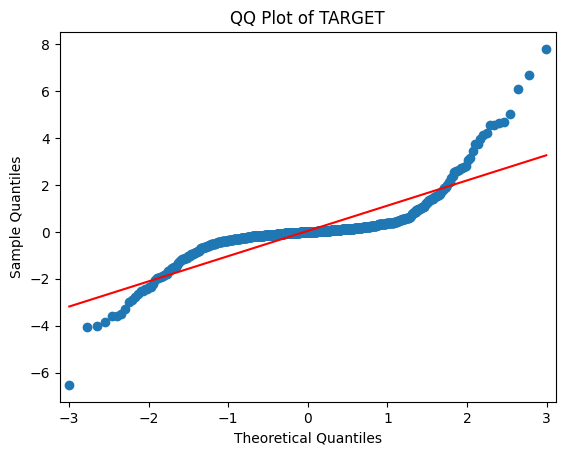

In [33]:
import statsmodels.api as sm

sm.qqplot(fr['TARGET'], line='s')
plt.title('QQ Plot of TARGET')
plt.show()

In [34]:
mean_value = fr['TARGET'].mean()
std_dev = fr['TARGET'].std()

threshold = 3 * std_dev

outliers = fr['TARGET'][np.abs(fr['TARGET'] - mean_value) > threshold]

fr_o = fr[np.abs(fr['TARGET'] - mean_value) <= threshold]

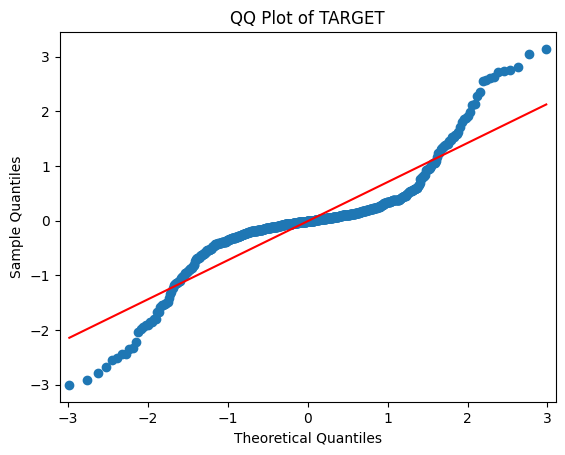

In [35]:
import statsmodels.api as sm

sm.qqplot(fr_o['TARGET'], line='s')
plt.title('QQ Plot of TARGET')
plt.show()

In [36]:
fr_o.to_csv("fr_train_outlier.csv")

# Data Smoothing

In [37]:
window_size = 3 # could be used as a parameter to detect the optimal smoothing strategy

exclude_columns = ['ID', 'DAY_ID', 'COUNTRY', 'TARGET']

smoothed_columns = pd.DataFrame(index=fr_train.index)
for column in fr_train.columns:
    if column not in exclude_columns:
        smoothed_column_name = f'{column}_smooth'
        smoothed_columns[smoothed_column_name] = fr_train[column].rolling(window=window_size, min_periods=1).mean()

fr_train = pd.concat([fr_train, smoothed_columns], axis=1)



In [38]:
smoothed_columns_de = pd.DataFrame(index=de_train.index)
for column in de_train.columns:
    if column not in exclude_columns:
        smoothed_column_name_de = f'{column}_smooth'
        smoothed_columns_de[smoothed_column_name_de] = de_train[column].rolling(window=window_size, min_periods=1).mean()

de_train = pd.concat([de_train, smoothed_columns_de], axis=1)

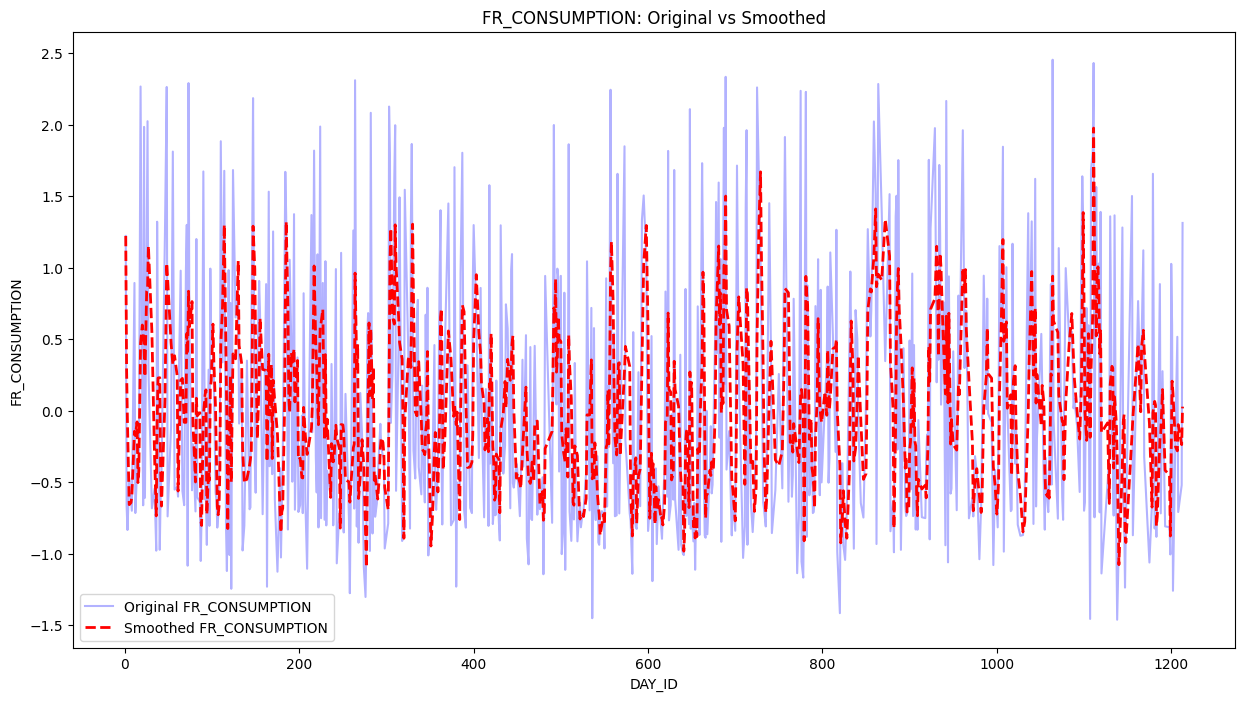

In [39]:
# Plotting the original vs. smoothed data with improved visualization
plt.figure(figsize=(15, 8))  # Increase the size of the plot
plt.plot(fr_train['DAY_ID'], fr_train['FR_CONSUMPTION'], label='Original FR_CONSUMPTION', alpha=0.3, color='blue')  # Reduced alpha
plt.plot(fr_train['DAY_ID'], fr_train['FR_CONSUMPTION_smooth'], label='Smoothed FR_CONSUMPTION', color='red', linestyle='--', linewidth=2)  # Thicker line
plt.title('FR_CONSUMPTION: Original vs Smoothed')
plt.xlabel('DAY_ID')
plt.ylabel('FR_CONSUMPTION')
plt.legend()
plt.show()
